# WeatherPy


In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/City_WeatherData.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

In [104]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Lat': "", 'Lng': "",'Max Temp': "",
                             'Humidity': "",'Cloudiness': "", 'Windspeed': "",
                             'Country': "",'Date': ""})

#Preview the dataframe
city_weather.head(100)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,san patricio,,,,,,,,
1,takoradi,,,,,,,,
2,svetlogorsk,,,,,,,,
3,albany,,,,,,,,
4,airai,,,,,,,,
...,...,...,...,...,...,...,...,...,...
95,nanortalik,,,,,,,,
96,kahului,,,,,,,,
97,victoria,,,,,,,,
98,kruisfontein,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:

#Variable to keep track of response number
record_num = 1


# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# Print Log opening statement

print(f'Beginning Data Retrieval')
print(f'-------------------------------')

# Loop through cities in city list and run API calls
for index, row in city_weather.iterrows():
    
    # Build query URL
    query_url = url + 'appid=' + weather_api_key + '&q=' + row['City'] +'&units=' + units
#     print(f'{query_url}')
    # Get weather data
    response = requests.get(query_url).json()
 
    #Try to access key that doesn't exist
    try:
        print(f'Processing Record {record_num} | {response["name"]}')
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
#      # If no record found "skip" to next call
    except KeyError:
        print(f'City not found. Skipping...')
        
print(f'-----------------------\nData Retrieval Complete\n--------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 | San Patricio
Processing Record 2 | Takoradze
Processing Record 3 | Forsytheganj
Processing Record 4 | Albany
Processing Record 5 | Airai
Processing Record 6 | Minnedosa
Processing Record 7 | Ketchikan
Processing Record 8 | Mossamedes
City not found. Skipping...
Processing Record 9 | Cape Canaveral
Processing Record 10 | Rikitea
Processing Record 11 | New Norfolk
Processing Record 12 | Atuona
Processing Record 13 | Vila
Processing Record 14 | Bubaque
Processing Record 15 | Miran Shah
Processing Record 16 | Luancheng
Processing Record 17 | Busselton
Processing Record 18 | Kavieng
Processing Record 19 | Nguruka
Processing Record 20 | Husavik
Processing Record 21 | Qaanaaq
Processing Record 22 | Mataura
Processing Record 23 | Boende
Processing Record 24 | Jamestown
Processing Record 25 | Chokurdakh
Processing Record 26 | San Francisco
Processing Record 27 | Yellowknife
Processing Record 28 | Ushuaia
Processing R

City not found. Skipping...
Processing Record 235 | Mīrābād
Processing Record 236 | Naze
Processing Record 237 | Bjørnevatn
Processing Record 238 | Flinders
Processing Record 239 | Pangnirtung
Processing Record 240 | Sokolo
Processing Record 241 | Vanimo
Processing Record 242 | Luoyang
Processing Record 243 | Bolshoye Nagatkino
Processing Record 244 | Krasnogorsk
Processing Record 245 | Tabou
Processing Record 246 | Srednekolymsk
City not found. Skipping...
Processing Record 247 | Kasungu
Processing Record 248 | Billings Metropolitan Area
Processing Record 249 | Rabat
Processing Record 250 | Tasiilaq
Processing Record 251 | Manokwari
Processing Record 252 | Santa Fe
Processing Record 253 | Ōdachō-ōda
Processing Record 254 | Upernavik
City not found. Skipping...
Processing Record 255 | Amarante do Maranhão
Processing Record 256 | Abhā
Processing Record 257 | Mendoza
Processing Record 258 | Nantucket
City not found. Skipping...
Processing Record 259 | Marawi
Processing Record 260 | Wagar

Processing Record 461 | Pirovskoye
Processing Record 462 | Gornopravdinsk
Processing Record 463 | Narsaq
Processing Record 464 | Šilutė
Processing Record 465 | Kozhva
Processing Record 466 | Upata
Processing Record 467 | Coahuayana Viejo
Processing Record 468 | Yulara
Processing Record 469 | Keffi
Processing Record 470 | Timon
Processing Record 471 | Moerai
Processing Record 472 | Cap Malheureux
City not found. Skipping...
Processing Record 473 | São João da Barra
Processing Record 474 | Nuuk
Processing Record 475 | Rhyl
Processing Record 476 | Akçakoca
City not found. Skipping...
Processing Record 477 | Korla
Processing Record 478 | Filingué
Processing Record 479 | Qidong
Processing Record 480 | Inhambupe
Processing Record 481 | Zinder
Processing Record 482 | Torbay
Processing Record 483 | Kawalu
Processing Record 484 | Puerto del Rosario
City not found. Skipping...
Processing Record 485 | Udachny
City not found. Skipping...
Processing Record 486 | Bugene
Processing Record 487 | Marsh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
# Clean dataframe to remove cities that were not found
city_weather = city_weather.replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("../Output/City_WeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,san patricio,28.0170,-97.5169,69.01,100.0,90.0,4.61,US,1.612957e+09
1,takoradi,4.8845,-1.7554,86.56,67.0,11.0,7.29,GH,1.612957e+09
2,svetlogorsk,52.6333,29.7333,15.12,96.0,99.0,8.59,BY,1.612957e+09
3,albany,42.6001,-73.9662,19.40,86.0,90.0,8.05,US,1.612957e+09
4,airai,-8.9266,125.4092,62.98,100.0,99.0,1.97,TL,1.612957e+09


In [111]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.00000,5.660000e+02
mean,20.295099,19.943109,52.125495,71.680212,51.904594,8.01606,1.612957e+09
std,32.375396,90.551131,32.993767,22.385011,38.101421,5.83957,6.403546e+01
min,-54.800000,-179.166700,-41.800000,7.000000,0.000000,0.16000,1.612956e+09
25%,-6.193000,-60.388300,28.400000,62.250000,11.000000,3.60250,1.612957e+09
50%,23.053800,25.703800,63.735000,78.000000,58.000000,6.81000,1.612957e+09
75%,46.797000,103.485500,78.685000,87.750000,90.000000,11.20250,1.612957e+09
max,78.218600,179.316700,110.800000,100.000000,100.000000,33.71000,1.612957e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
#  Get the indices of cities that have humidity over 100%.
index_label = city_weather[city_weather['Humidity']>100].index.tolist() 
index_label

[]

In [137]:

print(f'After inspection, no cities with humidity >100% were found!')


After inspection, no cities with humidity >100% were found!



### Analysis
* The climate model depicts temperature change by latitude. As we approach the equator the temperature range increases.

* The temperatures are cooler in northen hemisphere as expected in February.

* Humidity, Cloudiness and Wind Speed don't seem to have a strong correlation to latitude. The scatter plots show a spread out distribution at similar latitudes. Most of the wind speed values are below 20 mph.

* Wind speeds are generally betweeen 0 and 15 mph regardless of the latitude.

## Latitude vs. Temperature Plot

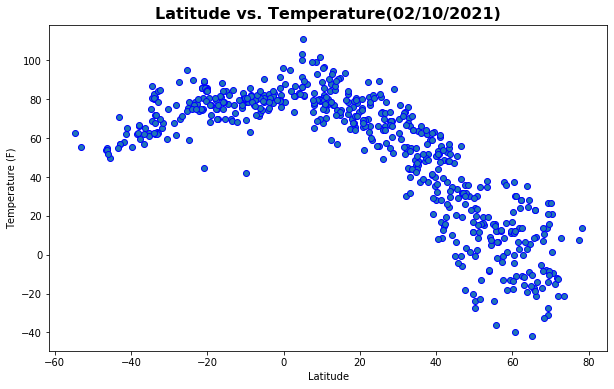

In [115]:
#Generate a scatter plot of Latitude vs. Temperature 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Max Temp'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Temperature(02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

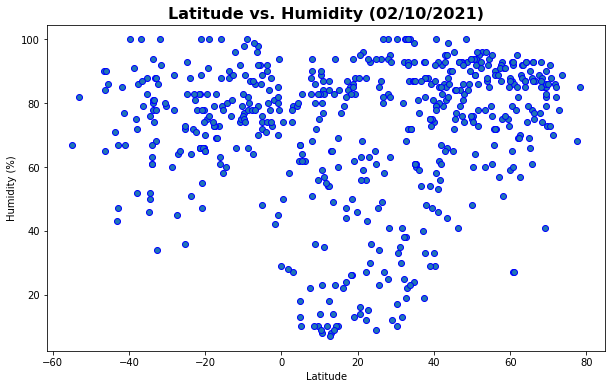

In [116]:
#Generate a scatter plot of Latitude vs. Humidity 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Humidity'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Humidity (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

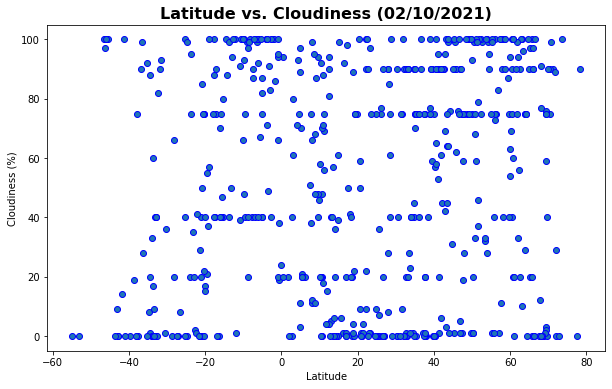

In [118]:
#Generate a scatter plot of Latitude vs. Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Cloudiness (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

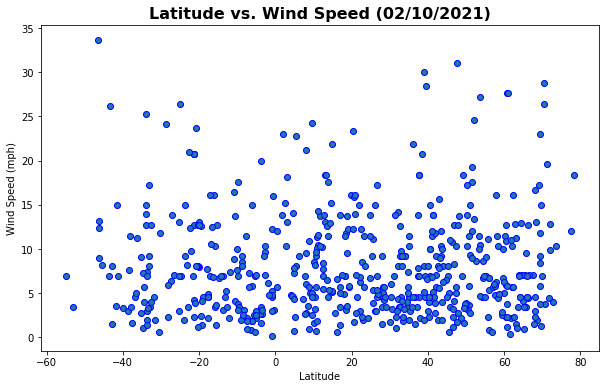

In [119]:
#Generate a scatter plot of Latitude vs. Humidity 
plt.figure(figsize=(10,6))
plt.scatter(city_weather['Lat'], city_weather['Windspeed'],edgecolors='b')

# Set a title for the chart
plt.title('Latitude vs. Wind Speed (02/10/2021)', fontweight='bold',fontsize = 16)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save an image of our chart and print the final product to the screen
plt.savefig('../Output/lat_wind.png')
plt.show()

## Linear Regression

In [120]:
# Northern and Southern Hemispheres
northern_hemisphere = city_weather.loc[city_weather['Lat'] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = city_weather.loc[city_weather['Lat'] < 0.0]
southern_hemisphere.reset_index(inplace=True)


In [121]:
# Define Linear Regression Function
def linear_regression(x_value,y_value,xlabel,ylabel,label_pos,fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value , y_value)
    # Print r value
    print(f'The r-value is: {rvalue**2}')
    regress_values = x_value * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot and annotate the line equation
    plt.scatter(x_value,y_value, edgecolors='b')
    plt.plot(x_value,regress_values,'r-')
    plt.annotate(line_eq,label_pos,fontsize=15,color='red')

    # Set a title for the chart
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Save an image of our chart and print the final product to the screen
    plt.savefig(f'../Output/linearregression{fig}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7953745345265651


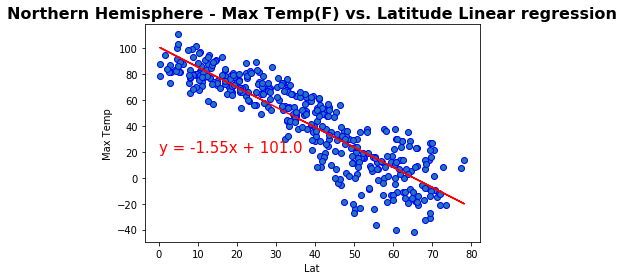

In [138]:
xlabel = 'Lat'
ylabel = 'Max Temp'
label_pos = (0,20)
plt.title('Northern Hemisphere - Max Temp(F) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,1)


* The Max Temperature appears to have a strong negative linear relationship(negative slope) with latitudes in the northern hemisphere, with an r-value of 0.8. As latitude increase Max Temp decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.338069562930674


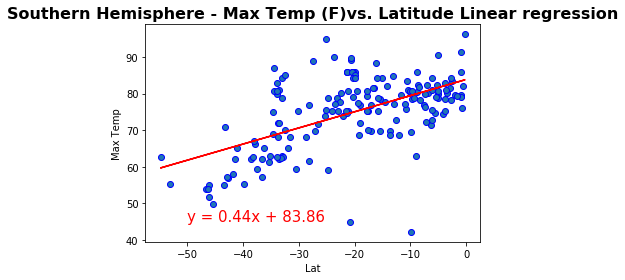

In [139]:
xlabel = 'Lat'
ylabel = 'Max Temp'
label_pos = (-50,45)
plt.title('Southern Hemisphere - Max Temp (F)vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,2)

* The Max Temperature appears to have a weak positive linear relationship(positive slope) with latitudes in the southern hemisphere, with an r-value of 0.34. As latitude increase Max Temp should increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15770776476910686


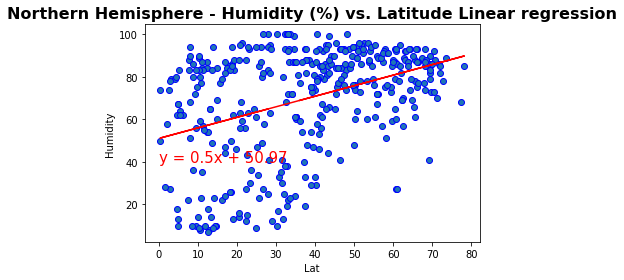

In [127]:
xlabel = 'Lat'
ylabel = 'Humidity'
label_pos = (0,40)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,3)


* The data seems to have no relationship between the humidity and latitude for the northern hemisphere since the r-value <0.3

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009747893611299591


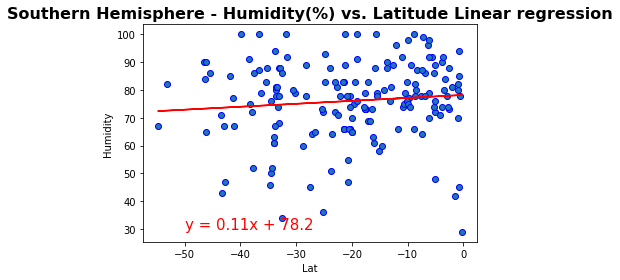

In [128]:
xlabel = 'Lat'
ylabel = 'Humidity'
label_pos = (-50,30)
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,4)


* The data seems to have no relationship between the humidity and latitude for the southern hemisphere since the r-value <0.3

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04225542513533164


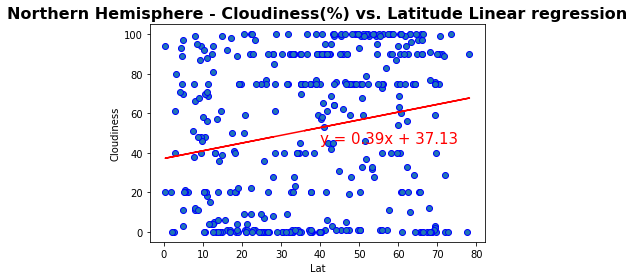

In [129]:
xlabel = 'Lat'
ylabel = 'Cloudiness'
label_pos = (40,45)
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,5)

* r-value is <0.3 ,hence the data seems to have no relationship between cloudiness and latitude for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17110671367506458


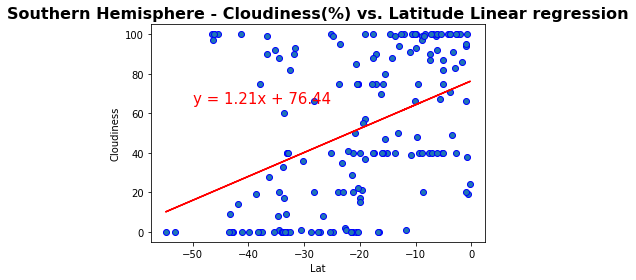

In [130]:
xlabel = 'Lat'
ylabel = 'Cloudiness'
label_pos = (-50,65)
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,6)

* Since r-value is <0.3 there seems to have no relationship between cloudiness and latitude for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 2.5239618911921625e-05


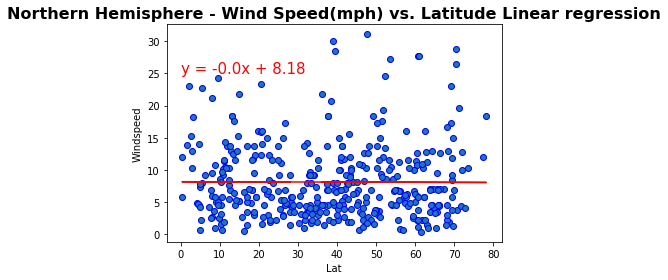

In [133]:
xlabel = 'Lat'
ylabel = 'Windspeed'
label_pos = (0,25)
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,label_pos,7)

* The Wind speed appears to have a strong linear relationship with latitudes in the northern hemisphere, with an r-value of 2.5. This can be explained via the fact that the northern hemishere is cooler at this time of the year. The winter brings higher temperature gradients, especially when cold fronts move in from polar regions, and this causes wind speeds that are higher than normal.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.035508525591257965


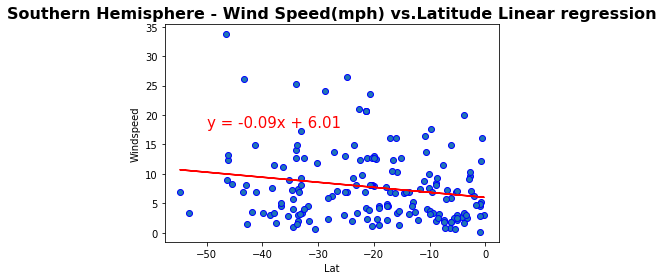

In [134]:
xlabel = 'Lat'
ylabel = 'Windspeed'
label_pos = (-50,18)
plt.title('Southern Hemisphere - Wind Speed(mph) vs.Latitude Linear regression', fontweight='bold',fontsize = 16)
linear_regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,label_pos,8)

* Since r-vale <0.3 there seems to be no correlation between wind speed and latitude for the southern hemisphere.